In [1]:
!pip install skforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 2.1 MB/s 
     |████████████████████████████████| 9.8 MB 3.9 MB/s 
     |████████████████████████████████| 76 kB 5.8 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstalling tqdm-4.64.0:
      Successfully uninstalled tqdm-4.64.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## Prova Mineração de dados

#### Aluno: Lucas Garavaglia

Descrição do problema:

Time Series in IOT (Internet of Things)
O objetivo do dataset é de prever os padrões de tráfego em uma determinada cidade em dados cruzamentos.

O dataset trás os dados de 4 cruzamentos de uma cidade durante o periodo de 1 ano, com o intervalo de
tempo de uma hora

link: https://www.kaggle.com/datasets/vetrirah/ml-iot

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load


import warnings

In [4]:
#Import do dataset
train = pd.read_csv('./train_ML_IOT.csv')

In [5]:
#Renomeando a coluna DateTime para date para o funcionamento do algoritmo
train = train.rename(columns={'DateTime': 'date','Vehicles':'y'})
train.drop(["ID"],axis = 1,inplace=True)

j1 = train[train["Junction"]==1]

j1.drop(["Junction"],axis = 1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


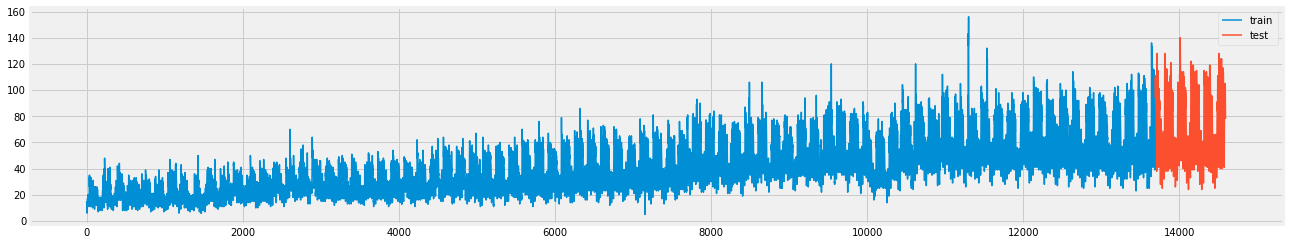

In [6]:
#Split dos dados de treino e teste
steps = 900
data_train_j1 = j1[:-steps]
data_test_j1  = j1[-steps:]

#Serie temporal dividida em train and test
fig, ax=plt.subplots(figsize=(20, 4))
data_train_j1['y'].plot(ax=ax, label='train')
data_test_j1['y'].plot(ax=ax, label='test')
ax.legend();

In [44]:
#Criando forecaster para a predição
#lags = janela
forecaster_j1 = ForecasterAutoreg(regressor = LinearRegression(),lags = 12)#lags = janela


#Treinando forecaster
forecaster_j1.fit(y=data_train_j1['y'])

#Quantidade de dados preditos
steps = 900
predictions_j1 = forecaster_j1.predict(steps=steps)

/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:257: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:257: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'


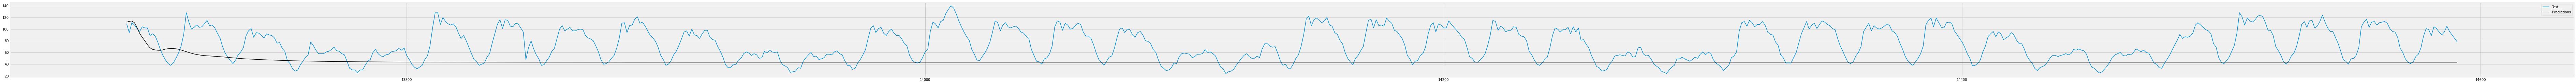

In [45]:
#Plotando o grafico da serie temporal.

fig, ax = plt.subplots(figsize=(120, 4))
data_test_j1['y'].plot(ax=ax, label='Test')
predictions_j1.plot(ax=ax, label='Predictions',color="black")
ax.legend();

In [46]:
# Test de erro
error_mse = mean_squared_error(
                y_true = data_test_j1['y'],
                y_pred = predictions_j1
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 1571.5659980901169


In [47]:
#Obs, foi tentado o uso de um RandomForestRegression, exigia muito tempo de processamento, 
#ficou mais de 5 horas e não terminou, portanto fui para outro modelo para a prova.
#Como próximo passo seria ideal a tentativa de uso do randomForest novamente, selecionando
#a melhor métrica para o mesmo também.


#Escolha de melhores parametros utilizando grid search
steps = 800
forecaster = ForecasterAutoreg(
                regressor = LinearRegression(),
                lags      = 12 
             )

lags_grid = [ 200,300,500,600,800]

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train_j1['y'],
                        param_grid         = {},
                        lags_grid          = lags_grid,
                        steps              = steps,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train_j1)*0.5)
               )

Number of models compared: 5


loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training or as initial window: 6846
Number of observations used for backtesting: 6846
    Number of folds: 9
    Number of steps per fold: 800
    Last fold only includes 446 observations

Data partition in fold: 0
    Training:   0 -- 6845
    Validation: 6846 -- 7645
Data partition in fold: 1
    Training:   0 -- 6845
    Validation: 7646 -- 8445
Data partition in fold: 2
    Training:   0 -- 6845
    Validation: 8446 -- 9245
Data partition in fold: 3
    Training:   0 -- 6845
    Validation: 9246 -- 10045
Data partition in fold: 4
    Training:   0 -- 6845
    Validation: 10046 -- 10845
Data partition in fold: 5
    Training:   0 -- 6845
    Validation: 10846 -- 11645
Data partition in fold: 6
    Training:   0 -- 6845
    Validation: 11646 -- 12445
Data partition in fold: 7
    Training:   0 -- 6845
    Validation: 12446 -- 13245
Data partition in fold: 8
    Training:   0 

/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:257: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:257: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` 

Information of backtesting process
----------------------------------
Number of observations used for initial training or as initial window: 6846
Number of observations used for backtesting: 6846
    Number of folds: 9
    Number of steps per fold: 800
    Last fold only includes 446 observations

Data partition in fold: 0
    Training:   0 -- 6845
    Validation: 6846 -- 7645
Data partition in fold: 1
    Training:   0 -- 6845
    Validation: 7646 -- 8445
Data partition in fold: 2
    Training:   0 -- 6845
    Validation: 8446 -- 9245
Data partition in fold: 3
    Training:   0 -- 6845
    Validation: 9246 -- 10045
Data partition in fold: 4
    Training:   0 -- 6845
    Validation: 10046 -- 10845
Data partition in fold: 5
    Training:   0 -- 6845
    Validation: 10846 -- 11645
Data partition in fold: 6
    Training:   0 -- 6845
    Validation: 11646 -- 12445
Data partition in fold: 7
    Training:   0 -- 6845
    Validation: 12446 -- 13245
Data partition in fold: 8
    Training:   0 

/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwrit

Information of backtesting process
----------------------------------
Number of observations used for initial training or as initial window: 6846
Number of observations used for backtesting: 6846
    Number of folds: 9
    Number of steps per fold: 800
    Last fold only includes 446 observations

Data partition in fold: 0
    Training:   0 -- 6845
    Validation: 6846 -- 7645
Data partition in fold: 1
    Training:   0 -- 6845
    Validation: 7646 -- 8445
Data partition in fold: 2
    Training:   0 -- 6845
    Validation: 8446 -- 9245
Data partition in fold: 3
    Training:   0 -- 6845
    Validation: 9246 -- 10045
Data partition in fold: 4
    Training:   0 -- 6845
    Validation: 10046 -- 10845
Data partition in fold: 5
    Training:   0 -- 6845
    Validation: 10846 -- 11645
Data partition in fold: 6
    Training:   0 -- 6845
    Validation: 11646 -- 12445
Data partition in fold: 7
    Training:   0 -- 6845
    Validation: 12446 -- 13245
Data partition in fold: 8
    Training:   0 

/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwrit

Information of backtesting process
----------------------------------
Number of observations used for initial training or as initial window: 6846
Number of observations used for backtesting: 6846
    Number of folds: 9
    Number of steps per fold: 800
    Last fold only includes 446 observations

Data partition in fold: 0
    Training:   0 -- 6845
    Validation: 6846 -- 7645
Data partition in fold: 1
    Training:   0 -- 6845
    Validation: 7646 -- 8445
Data partition in fold: 2
    Training:   0 -- 6845
    Validation: 8446 -- 9245
Data partition in fold: 3
    Training:   0 -- 6845
    Validation: 9246 -- 10045
Data partition in fold: 4
    Training:   0 -- 6845
    Validation: 10046 -- 10845
Data partition in fold: 5
    Training:   0 -- 6845
    Validation: 10846 -- 11645
Data partition in fold: 6
    Training:   0 -- 6845
    Validation: 11646 -- 12445
Data partition in fold: 7
    Training:   0 -- 6845
    Validation: 12446 -- 13245
Data partition in fold: 8
    Training:   0 

/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwrit

Information of backtesting process
----------------------------------
Number of observations used for initial training or as initial window: 6846
Number of observations used for backtesting: 6846
    Number of folds: 9
    Number of steps per fold: 800
    Last fold only includes 446 observations

Data partition in fold: 0
    Training:   0 -- 6845
    Validation: 6846 -- 7645
Data partition in fold: 1
    Training:   0 -- 6845
    Validation: 7646 -- 8445
Data partition in fold: 2
    Training:   0 -- 6845
    Validation: 8446 -- 9245
Data partition in fold: 3
    Training:   0 -- 6845
    Validation: 9246 -- 10045
Data partition in fold: 4
    Training:   0 -- 6845
    Validation: 10046 -- 10845
Data partition in fold: 5
    Training:   0 -- 6845
    Validation: 10846 -- 11645
Data partition in fold: 6
    Training:   0 -- 6845
    Validation: 11646 -- 12445
Data partition in fold: 7
    Training:   0 -- 6845
    Validation: 12446 -- 13245
Data partition in fold: 8
    Training:   0 

/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:312: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwrit

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 22

/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:257: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'


In [48]:
results_grid

,lags,params,metric
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{},57.817058
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{},58.229265
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{},61.685204
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{},77.517823
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{},89.282259


In [49]:
#Criando forecaster para a predição
#lags = janela
forecaster_j1t = ForecasterAutoreg(regressor = LinearRegression(),lags = 500)

#Treinando forecaster
forecaster_j1t.fit(y=data_train_j1['y'])

#Quantidade de dados preditos
steps = 900
predictions_j1t = forecaster_j1t.predict(steps=steps)

/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:257: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'
/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:257: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  '`y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.'


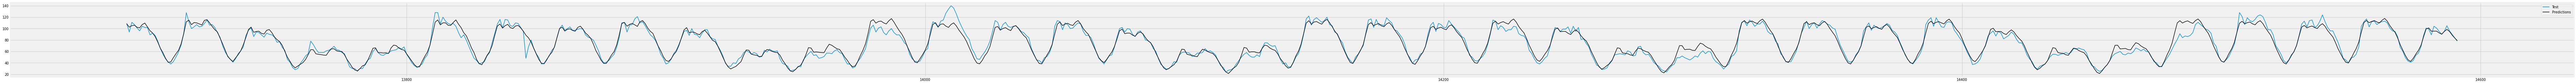

In [50]:
fig, ax = plt.subplots(figsize=(120, 4))
data_test_j1['y'].plot(ax=ax, label='Test')
predictions_j1t.plot(ax=ax, label='Predictions',color="black")
ax.legend();

In [51]:
error_mse = mean_squared_error(
                y_true = data_test_j1['y'],
                y_pred = predictions_j1t
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 44.752847853704786


Após a escolha da melhor métrica usando o grid_search_forecaster chegou-se ao valor de 500 para o lags, chegando a um (MSE) Mean Squared Error menor de 44.74, melhor que o antigo de 1571.56.

Logo a nova métrica se mostra melhor para predição do modelo.